In [1]:
import pandas as pd
import numpy as np


In [2]:
#Dataset used here is combined cycle powerplant
data_df=pd.read_csv('C:/Users/Harsha/Downloads/ccpp mlr.csv')

In [28]:
data_df.head()#AT-avg.temp(X-independend variable)
               #V-exhaust vaccum(X)
               #AP-Ambient pressure(X)
               #RH-Relative humidity(X)
               #PE-Net of hourly electrical energy output(which is dependend variable that is going to be predicted)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
data_df.tail()

,AT,V,AP,RH,PE
47839,15.12,48.92,1011.8,72.93,462.59
47840,33.41,77.95,1010.3,59.72,432.9
47841,15.99,43.34,1014.2,78.66,465.96
47842,17.65,59.87,1018.58,94.65,450.93
47843,23.68,51.3,1011.86,71.24,451.67


In [5]:
data_df.shape

(47844, 5)

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47844 entries, 0 to 47843
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AT      47844 non-null  object
 1   V       47844 non-null  object
 2   AP      47844 non-null  object
 3   RH      47844 non-null  object
 4   PE      47844 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


In [8]:
data_df.describe().head()

,AT,V,AP,RH,PE
count,47844,47844,47844,47844,47844
unique,2774,635,2518,4547,4837
top,25.21,41.17,1013.88,100.09,468.8
freq,70,305,80,130,45


In [11]:
data_df.isnull()

,AT,V,AP,RH,PE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
47839,False,False,False,False,False
47840,False,False,False,False,False
47841,False,False,False,False,False
47842,False,False,False,False,False


In [12]:
data_df.isnull().sum()#There is no null values

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [15]:
data_df.dtypes

AT    object
V     object
AP    object
RH    object
PE    object
dtype: object

In [16]:
#changing the object values to numwric
for column in data_df.columns:
    data_df[column] = pd.to_numeric(data_df[column], errors='coerce')


In [17]:
data_df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [18]:
data_df.dropna(inplace=True)

In [19]:
#Examining x and y
x=data_df.drop(['PE'],axis=1).values
y=data_df['PE'].values

In [29]:
x

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  15.99,   43.34, 1014.2 ,   78.66],
       [  17.65,   59.87, 1018.58,   94.65],
       [  23.68,   51.3 , 1011.86,   71.24]])

In [30]:
y

array([463.26, 444.37, 488.56, ..., 465.96, 450.93, 451.67])

In [22]:
#splitting the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
#importing the linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

ml = LinearRegression()
ml.fit(x_train, y_train)



LinearRegression()

In [24]:
y_pred=ml.predict(x_test)
print(y_pred)

[436.37633222 444.7912602  471.47270396 ... 471.86660944 433.45004126
 456.95994361]


In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9300410679875161

Text(0.5, 1.0, 'actual vs.predicted')

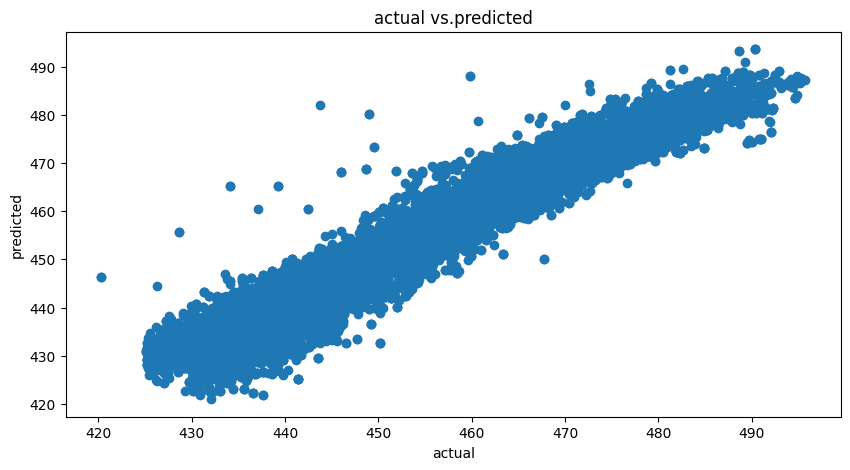

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual vs.predicted')


In [75]:
pred_y_df=pd.DataFrame({'actual value':y_test,'predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,actual value,predicted value,Difference
0,436.29,436.376332,-0.086332
1,438.08,444.791260,-6.711260
2,476.12,471.472704,4.647296
3,485.78,487.619758,-1.839758
4,436.08,434.227419,1.852581
5,449.88,455.702676,-5.822676
6,485.57,483.577764,1.992236
7,470.67,471.778083,-1.108083
8,453.47,450.159666,3.310334
9,430.50,434.071980,-3.571980
